### Average Consensus Explained

is another fundamental concept in the control of multi-agent systems. It involves agents in a network reaching an agreement on the average of their initial states through iterative updates based on the states of their neighbors.

In an average consensus algorithm, each agent updates its state to the average of its own state and the states of its neighbors. Mathematically, if we denote the state of agent $i$ at time $t$ as $x_i(t)$, the update rule can be expressed as:

$$
x_i(t+1) = \frac{x_i(t) + \sum_{j \in \mathcal{N}_i} x_j(t)}{|\mathcal{N}_i| + 1}
$$

where $\mathcal{N}_i$ is the set of neighbors of agent $i$, and $|\mathcal{N}_i|$ is the number of neighbors.

### Visual Example

Let's consider a simple network of four agents arranged in a line:

```
A -- B -- C -- D
```

- **Initial States**: Suppose the initial states of the agents are:
  - $x_A(0) = 4$
  - $x_B(0) = 2$
  - $x_C(0) = 8$
  - $x_D(0) = 16$

- **First Update**:
  - Agent A: $x_A(1) = \frac{4 + 2}{2} = 3$
  - Agent B: $x_B(1) = \frac{2 + 4 + 8}{3} \approx 4.67$
  - Agent C: $x_C(1) = \frac{8 + 2 + 16}{3} \approx 8.67$
  - Agent D: $x_D(1) = \frac{16 + 8}{2} = 12$

- **Second Update**:
  - Agent A: $x_A(2) = \frac{3 + 4.67}{2} \approx 3.83$
  - Agent B: $x_B(2) = \frac{4.67 + 3 + 8.67}{3} \approx 5.45$
  - Agent C: $x_C(2) = \frac{8.67 + 4.67 + 12}{3} \approx 8.45$
  - Agent D: $x_D(2) = \frac{12 + 8.67}{2} \approx 10.33$

After several iterations, the states of all agents will converge to the same value, achieving consensus.

### Python Code Example with Plot

Here's a Python example to simulate the average consensus and visualize the states of the agents over the iterations using Matplotlib:

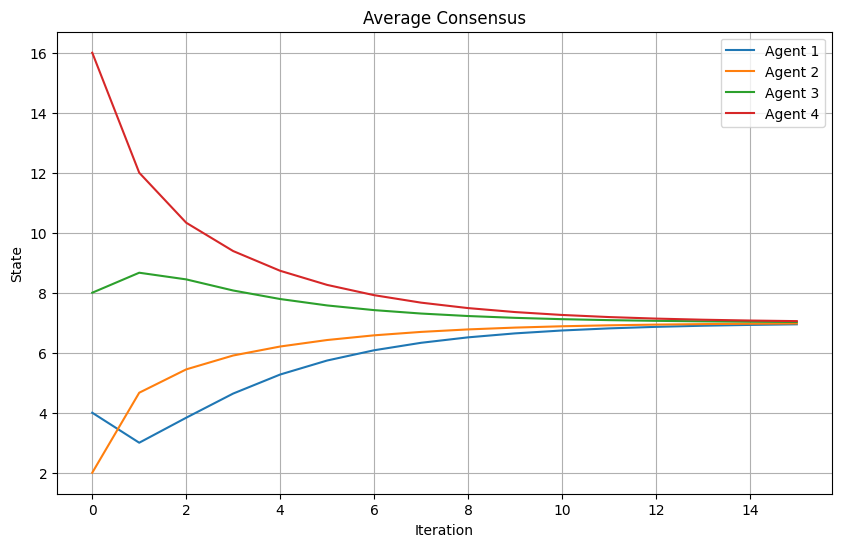

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states of the agents
states = np.array([4, 2, 8, 16], dtype=float)

# Adjacency matrix representing the network
# A -- B -- C -- D
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

def average_consensus(states, adj_matrix, iterations=10):
    num_agents = len(states)
    history = [states.copy()]
    for _ in range(iterations):
        new_states = np.zeros(num_agents)
        for i in range(num_agents):
            neighbors = np.where(adj_matrix[i] == 1)[0]
            new_states[i] = (states[i] + np.sum(states[neighbors])) / (len(neighbors) + 1)
        states = new_states
        history.append(states.copy())
    return np.array(history)

# Run the consensus algorithm
iterations = 15
history = average_consensus(states, adj_matrix, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(history.shape[1]):
    plt.plot(history[:, i], label=f'Agent {i+1}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Average Consensus')
plt.legend()
plt.grid(True)
plt.show()

### Explanation

1. **Initial States**: We start with the initial states of the agents.
2. **Adjacency Matrix**: This matrix represents the connections between the agents. A value of `1` indicates a connection, and `0` indicates no connection.
3. **Average Consensus Function**: This function iteratively updates the states of the agents based on the average of their neighbors' states.
4. **Plotting**: After running the consensus algorithm, we plot the states of each agent over the iterations using Matplotlib.

When you run this code, you will see a plot showing how the states of the agents converge over time.